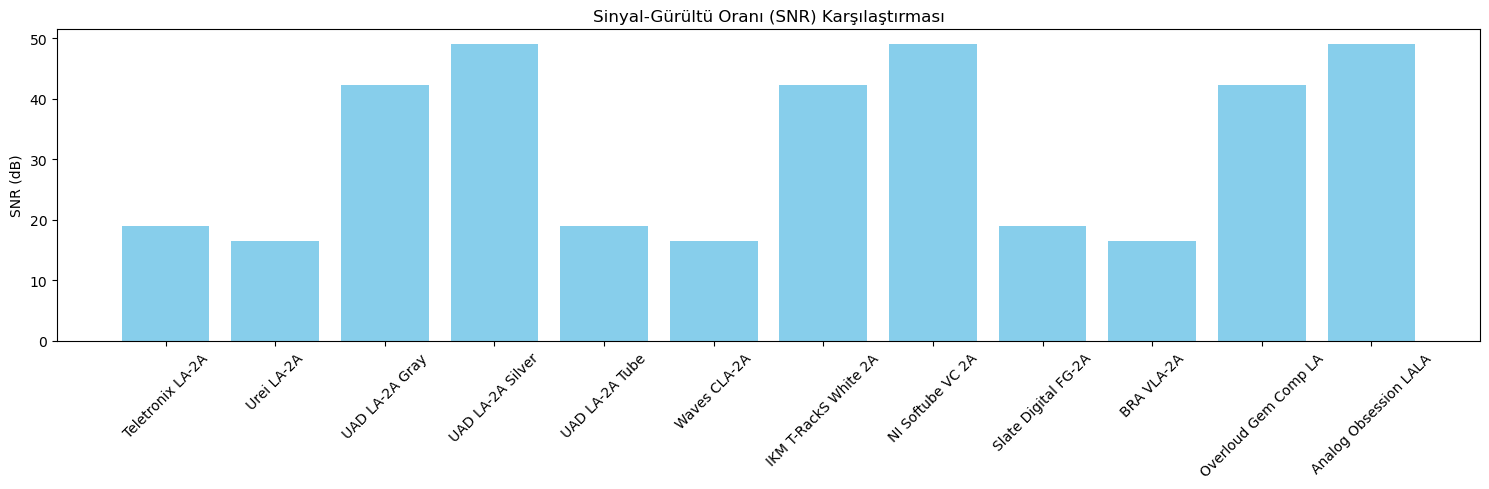

In [2]:
# Yüksek SNR: Cihaz sinyalini minimum gürültüyle işler; Düşük SNR: Cihaz, sinyale göre daha fazla gürültü ekler.

# SNR ve LA-2A gürültü analizinde white noise kullanılmalı.
# Bu sinyal, gürültü eklenmesi ve sinyalin bozulmasını detaylı ve doğru bir şekilde ölçmeye olanak tanır.

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.


# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/white.noise.LA2A Teletronix_05.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/white.noise.LA2A Urei_04.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/uad gray white noise.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/uad silver white noise.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/white.noise.LA2A Teletronix_05.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/white.noise.LA2A Urei_04.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/uad gray white noise.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/uad silver white noise.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/white.noise.LA2A Teletronix_05.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/white.noise.LA2A Urei_04.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/uad gray white noise.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/uad silver white noise.wav",
]

# Ses dosyalarının etiketleri
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# SNR hesaplama fonksiyonu
def calculate_snr(signal, sr):
    frame_length = int(sr * 0.05)  # 50 ms
    hop_length = frame_length // 2
    rms_energy = librosa.feature.rms(y=signal, frame_length=frame_length, hop_length=hop_length)[0]
    threshold = np.percentile(rms_energy, 20)
    noise_indices = rms_energy < threshold

    frame_times = librosa.frames_to_time(np.arange(len(rms_energy)), sr=sr, hop_length=hop_length)
    noise_signal = np.zeros_like(signal)

    for i, frame_time in enumerate(frame_times):
        start_sample = librosa.time_to_samples(frame_time, sr=sr)
        end_sample = librosa.time_to_samples(frame_time + 0.05, sr=sr)
        if noise_indices[i]:
            noise_signal[start_sample:end_sample] = signal[start_sample:end_sample]

    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise_signal ** 2)
    return 10 * np.log10(signal_power / noise_power)

# SNR analizi ve grafiği çizme fonksiyonu
def plot_snr(signals, labels, sr):
    snr_values = [calculate_snr(signal, sr) for signal in signals]
    plt.figure(figsize=(15, 5))
    plt.bar(labels, snr_values, color='skyblue')
    plt.title("Sinyal-Gürültü Oranı (SNR) Karşılaştırması")
    plt.ylabel("SNR (dB)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ses dosyalarını yükleme
signals = []
sample_rates = []

for file in audio_files:
    signal, sr = librosa.load(file, sr=None)
    signals.append(signal)
    sample_rates.append(sr)

# SNR analizini gerçekleştir ve grafiği çiz
plot_snr(
    signals=signals,
    labels=audio_labels,
    sr=sample_rates[0]
)
